## Import Libries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import Dataset

In [11]:
# Load data from 'reviews_with_topics_prec.csv' into a DataFrame
label_reviews = pd.read_csv("../Datasets/0.Dataset_reviews_prec.csv")


## EDA (Exploratory Data Analysis)

In [12]:
# Display the first five rows of the DataFrame 'label_reviews' for an initial overview of the data
label_reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Keywords,Dominant_Topic,Topic_Perc_Contrib
0,1943048,22379503,2014-11-04,14064862,Red,nokiko's apartment perfect ! could find everyt...,305,44,0.263095,"apartment, walk, time, location, need, area, s...",2,0.7657
1,7826669,589452051,2020-01-06,275798636,Josee,highly recommend bangkok bed bike bangkok pl...,537,81,0.247154,"apartment, walk, time, location, need, area, s...",2,0.4309
2,43949183,696756032099270993,2022-08-19,404398743,Sebastián,problem whole it’s far downtown me it’s easy ...,62,11,0.244444,"apartment, walk, time, location, need, area, s...",2,0.7397
3,30486035,763441256716296427,2022-11-19,55974377,Lucas,friendly building manager super convenient loc...,79,11,0.236111,"room, close, pool, convenient, much, work, bui...",0,0.4062
4,11914255,117276698,2016-12-05,80912513,Salma,"amazing small boutique hotel quite, comfy beds...",342,58,0.355556,"place, clean, recommend, location, host, helpf...",1,0.5155


In [13]:
# Renaming columns in the 'label_reviews' DataFrame for consistency and clarity
# 'Keyword' is changed to 'keyword' and 'Dominant_Topic' to 'topic'
label_reviews.rename(columns={'Keyword':'keyword'}, inplace=True)
label_reviews.rename(columns={'Dominant_Topic':'topic'}, inplace=True)


In [14]:
# Display a concise summary of the 'label_reviews' DataFrame, including the number of non-null entries, column data types
label_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   listing_id          100000 non-null  int64  
 1   id                  100000 non-null  int64  
 2   date                100000 non-null  object 
 3   reviewer_id         100000 non-null  int64  
 4   reviewer_name       100000 non-null  object 
 5   comments            98562 non-null   object 
 6   review_length       100000 non-null  int64  
 7   review_word_count   100000 non-null  int64  
 8   sentiment           100000 non-null  float64
 9   Keywords            100000 non-null  object 
 10  topic               100000 non-null  int64  
 11  Topic_Perc_Contrib  100000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 9.2+ MB


In [15]:
# Remove rows with missing values from the 'label_reviews' DataFrame
label_reviews.dropna(inplace=True)

# Convert the 'date' column in 'label_reviews' to datetime format for proper date handling
label_reviews['date'] = pd.to_datetime(label_reviews['date'])


In [16]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's numerical distributions
label_reviews.describe()


,listing_id,id,date,reviewer_id,review_length,review_word_count,sentiment,topic,Topic_Perc_Contrib
count,9.856200e+04,9.856200e+04,98562,9.856200e+04,98562.000000,98562.000000,98562.000000,98562.000000,98562.000000
mean,1.107499e+17,3.568943e+17,2020-06-30 01:49:05.613928448,1.420922e+08,155.307928,22.995566,0.265405,1.458432,0.512702
min,2.793400e+04,1.802610e+05,2011-02-09 00:00:00,4.200000e+02,1.000000,0.000000,-1.000000,0.000000,0.250000
25%,1.300932e+07,3.018625e+08,2018-08-05 00:00:00,3.271339e+07,49.000000,7.000000,0.083333,1.000000,0.406400
50%,2.352748e+07,5.953722e+08,2020-01-20 00:00:00,9.490463e+07,107.000000,16.000000,0.255804,1.000000,0.491800
75%,3.943442e+07,7.982381e+17,2023-01-06 00:00:00,2.123746e+08,205.000000,30.000000,0.400000,2.000000,0.619200
max,9.825307e+17,9.859672e+17,2023-09-22 00:00:00,5.372773e+08,3415.000000,496.000000,1.000000,3.000000,0.972500
std,2.673040e+17,4.064894e+17,NaN,1.382283e+08,163.918411,24.712642,0.235884,0.860699,0.146324


In [17]:
# Calculate the relative frequency distribution of different topics in 'label_reviews' as percentages
label_reviews["topic"].value_counts(normalize=True)


topic
2    0.387868
1    0.365871
0    0.140653
3    0.105609
Name: proportion, dtype: float64

### Based on the most common keywords for each topic, here are names:

- Topic 0: `Facilities` - This topic frequently mentions keywords like "room", "close", "pool", "convenient", and "much". It appears to focus on the room amenities and convenience factors of accommodations.

- Topic 1: `Cleanliness` - Keywords such as "place", "clean", "recommend", "location", and "host" are prevalent. This suggests a focus on the cleanliness and overall recommendability of the place, along with the importance of location and the host's role.

- Topic 2: `Location` - With keywords like "apartment", "walk", "time", "location", and "need", this topic seems to be centered around the location and accessibility of apartments, including walking distances and time considerations.

- Topic 3: `Customer_Service` - Keywords like "host", "check", "friendly", "responsive", and "experience" suggest a focus on interactions with the host and the overall guest experience.

In [18]:
label_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Keywords,topic,Topic_Perc_Contrib
0,1943048,22379503,2014-11-04,14064862,Red,nokiko's apartment perfect ! could find everyt...,305,44,0.263095,"apartment, walk, time, location, need, area, s...",2,0.7657
1,7826669,589452051,2020-01-06,275798636,Josee,highly recommend bangkok bed bike bangkok pl...,537,81,0.247154,"apartment, walk, time, location, need, area, s...",2,0.4309
2,43949183,696756032099270993,2022-08-19,404398743,Sebastián,problem whole it’s far downtown me it’s easy ...,62,11,0.244444,"apartment, walk, time, location, need, area, s...",2,0.7397
3,30486035,763441256716296427,2022-11-19,55974377,Lucas,friendly building manager super convenient loc...,79,11,0.236111,"room, close, pool, convenient, much, work, bui...",0,0.4062
4,11914255,117276698,2016-12-05,80912513,Salma,"amazing small boutique hotel quite, comfy beds...",342,58,0.355556,"place, clean, recommend, location, host, helpf...",1,0.5155


In [19]:
# Renaming the topic numbers in the 'topic' column to more descriptive names for clarity
# Topics are renamed as follows:
# 0 to 'Facilities_Convenience', 1 to 'Cleanliness_Hospitality',
# 2 to 'Location_Accessibility', and 3 to 'Host_Interaction_and_Experience'
label_reviews['topic'] = label_reviews['topic'].replace(
    [0, 1, 2, 3],
    ['Facilities', 'Cleanliness', 'Location', 'Customer_Service'])


In [20]:
label_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_length,review_word_count,sentiment,Keywords,topic,Topic_Perc_Contrib
0,1943048,22379503,2014-11-04,14064862,Red,nokiko's apartment perfect ! could find everyt...,305,44,0.263095,"apartment, walk, time, location, need, area, s...",Location,0.7657
1,7826669,589452051,2020-01-06,275798636,Josee,highly recommend bangkok bed bike bangkok pl...,537,81,0.247154,"apartment, walk, time, location, need, area, s...",Location,0.4309
2,43949183,696756032099270993,2022-08-19,404398743,Sebastián,problem whole it’s far downtown me it’s easy ...,62,11,0.244444,"apartment, walk, time, location, need, area, s...",Location,0.7397
3,30486035,763441256716296427,2022-11-19,55974377,Lucas,friendly building manager super convenient loc...,79,11,0.236111,"room, close, pool, convenient, much, work, bui...",Facilities,0.4062
4,11914255,117276698,2016-12-05,80912513,Salma,"amazing small boutique hotel quite, comfy beds...",342,58,0.355556,"place, clean, recommend, location, host, helpf...",Cleanliness,0.5155


<Axes: >

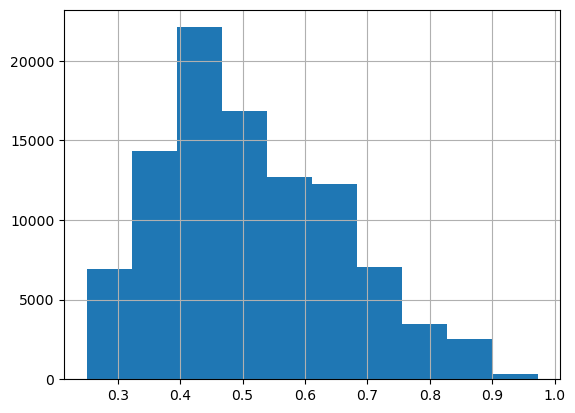

In [21]:
label_reviews["Topic_Perc_Contrib"].hist()

In [22]:
# Calculate the average 'Topic_Perc_Contrib' for each topic in the 'label_reviews' DataFrame
# This shows the mean percentage contribution of each topic across all documents
label_reviews.groupby('topic')['Topic_Perc_Contrib'].mean()


topic
Cleanliness         0.550183
Customer_Service    0.476422
Facilities          0.459825
Location            0.506400
Name: Topic_Perc_Contrib, dtype: float64

/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


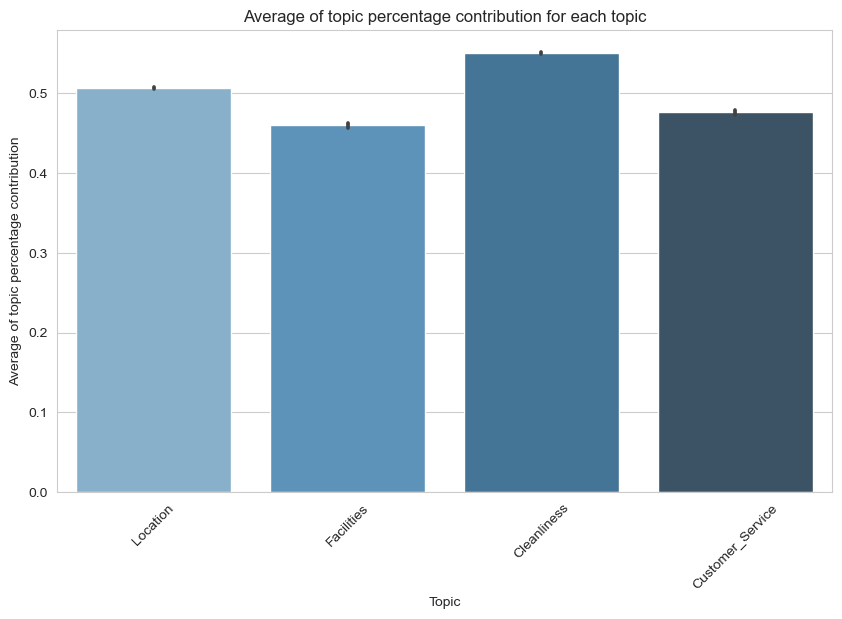

In [23]:
# Visualizing the average Topic Percentage Contribution for each topic using a bar plot
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 6)) 

# Create a bar plot showing the average Topic Percentage Contribution for each topic
sns.barplot(x='topic', y='Topic_Perc_Contrib', data=label_reviews, palette='Blues_d')

# Adding plot title and labels for clarity
plt.title('Average of topic percentage contribution for each topic')
plt.xlabel('Topic')
plt.ylabel('Average of topic percentage contribution')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [24]:
# Calculate the proportion of each topic in 'label_reviews' as a percentage of the total
label_reviews["topic"].value_counts(normalize=True)


topic
Location            0.387868
Cleanliness         0.365871
Facilities          0.140653
Customer_Service    0.105609
Name: proportion, dtype: float64


Correlation Analysis:
                   sentiment  review_word_count
sentiment            1.00000           -0.07408
review_word_count   -0.07408            1.00000


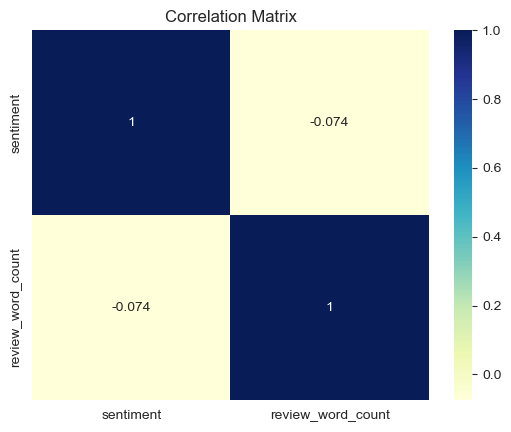

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCorrelation Analysis:")

# Calculate the correlation between 'sentiment' and 'review_word_count' columns
correlation = label_reviews[['sentiment', 'review_word_count']].corr()
print(correlation)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

# Adding a title to the heatmap for clarity
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


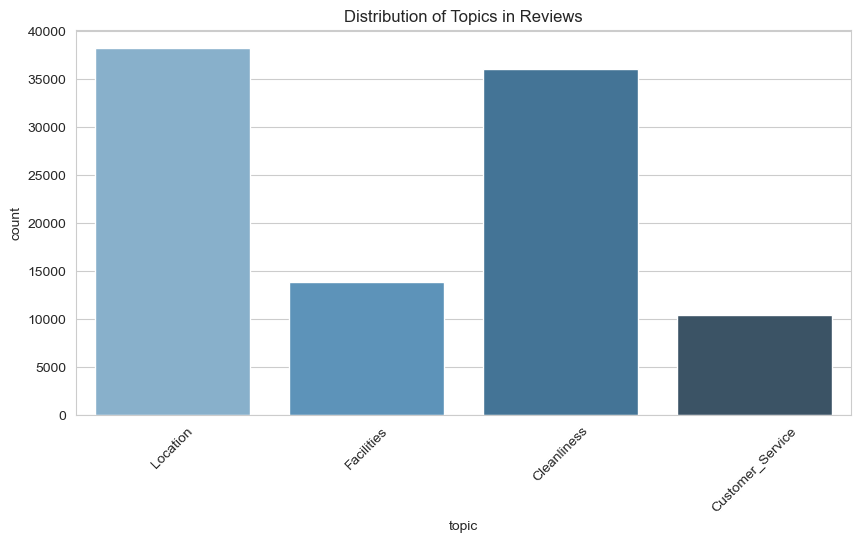

In [26]:
#Number of reviews per topic 
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of topics in 'label_reviews' using a Seaborn count plot with 'Blues_d' palette
plt.figure(figsize=(10, 5))
sns.countplot(x='topic', data=label_reviews, palette='Blues_d')

# Set the title of the plot
plt.title('Distribution of Topics in Reviews')

# Optionally, rotate the x-axis labels if they are overlapping or not clearly visible
plt.xticks(rotation=45)

# Display the plot
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

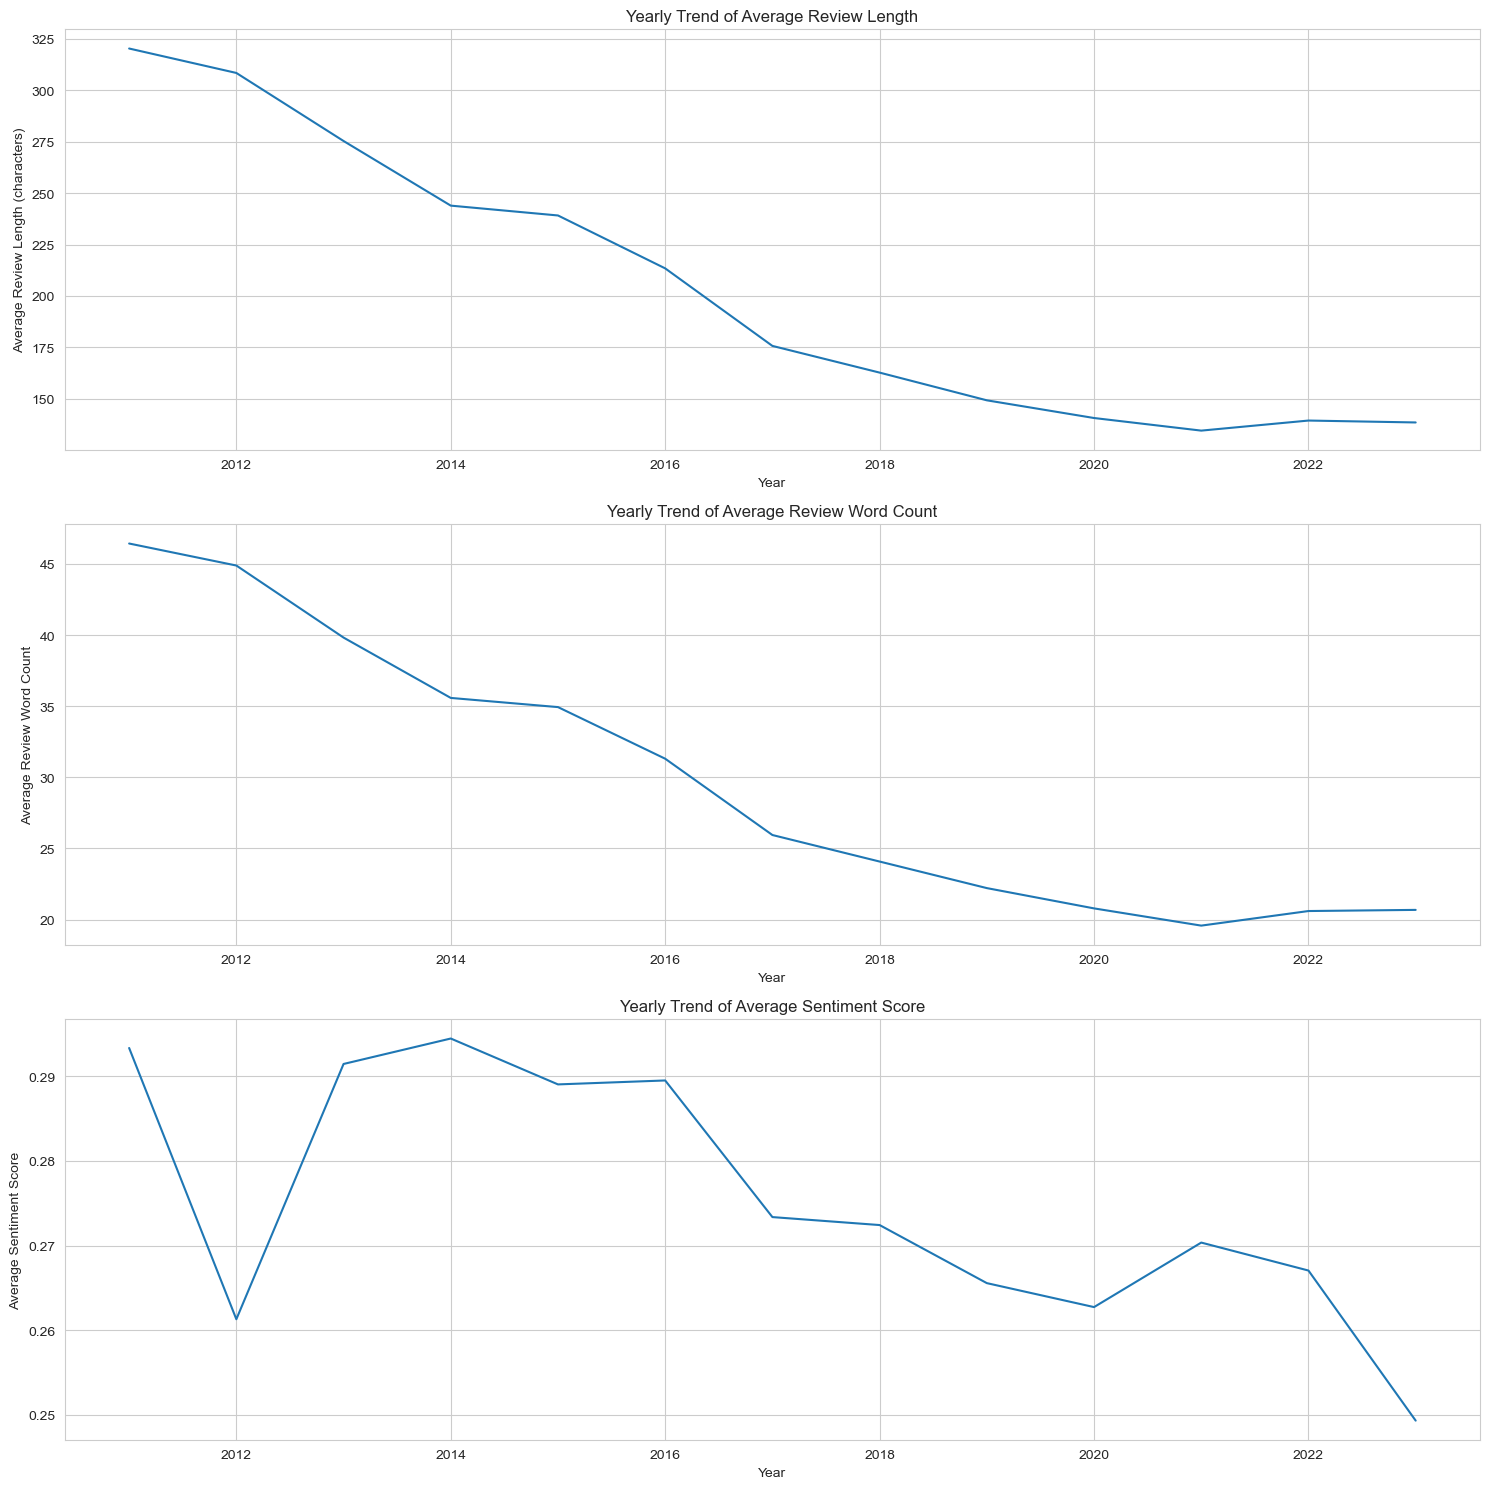

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by year for trend analysis
# Extracting the year from the 'date' column for each review
label_reviews['year'] = label_reviews['date'].dt.year

# Aggregating data by year, calculating mean review length, word count, sentiment, and finding the most frequent topic
yearly_data = label_reviews.groupby('year').agg({
    'review_length': 'mean', 
    'review_word_count': 'mean',
    'sentiment': 'mean',
    'topic': lambda x: x.mode()[0]  # Most frequent topic per year
}).reset_index()

# Setting up subplots for multiple line plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Plotting trend for average review length over the years
sns.lineplot(x='year', y='review_length', data=yearly_data, ax=axes[0])
axes[0].set_title('Yearly Trend of Average Review Length')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Review Length (characters)')

# Plotting trend for average review word count over the years
sns.lineplot(x='year', y='review_word_count', data=yearly_data, ax=axes[1])
axes[1].set_title('Yearly Trend of Average Review Word Count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Review Word Count')

# Plotting trend for average sentiment score over the years
sns.lineplot(x='year', y='sentiment', data=yearly_data, ax=axes[2])
axes[2].set_title('Yearly Trend of Average Sentiment Score')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Sentiment Score')

# Adjusting layout for clarity
plt.tight_layout()

# Displaying the plots
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


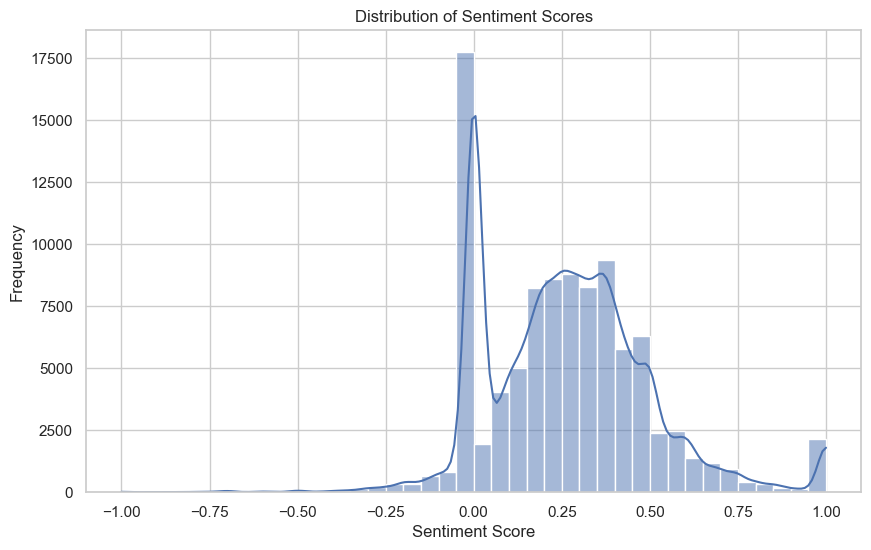

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with specified size
plt.figure(figsize=(10, 6))

# Plotting a histogram of sentiment scores with a Kernel Density Estimate (KDE) overlay
sns.histplot(label_reviews['sentiment'], kde=True, binwidth=0.05)

# Adding a title and labels to the plot for better readability and understanding
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


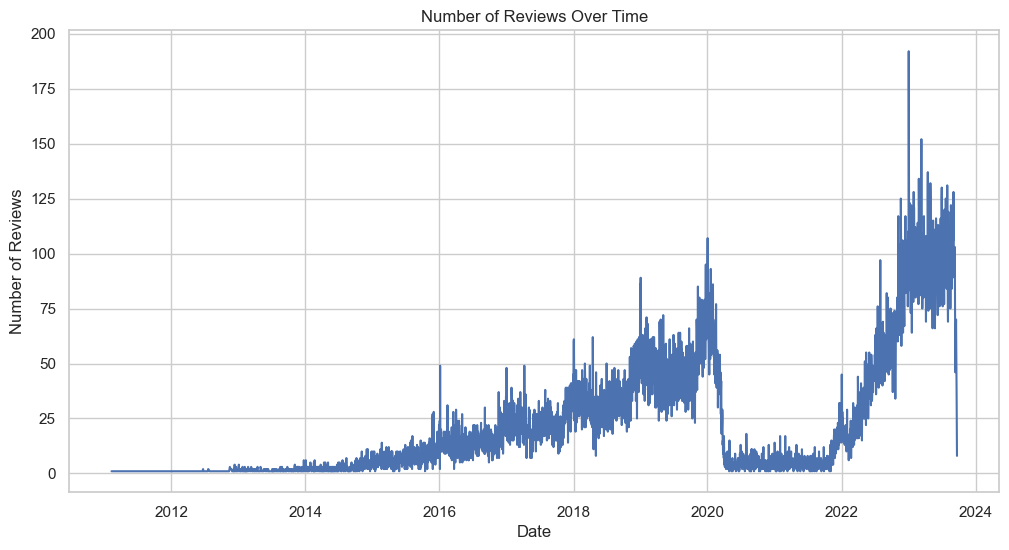

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format for easier date manipulation
label_reviews['date'] = pd.to_datetime(label_reviews['date'])

# Grouping the data by date and counting the number of reviews for each date
reviews_by_date = label_reviews.groupby(label_reviews['date'].dt.date).size()

# Setting up a plot with specified figure size
plt.figure(figsize=(12, 6))

# Plotting the number of reviews over time using a line plot
reviews_by_date.plot(kind='line')

# Adding a title and axis labels to the plot
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# Displaying the plot
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


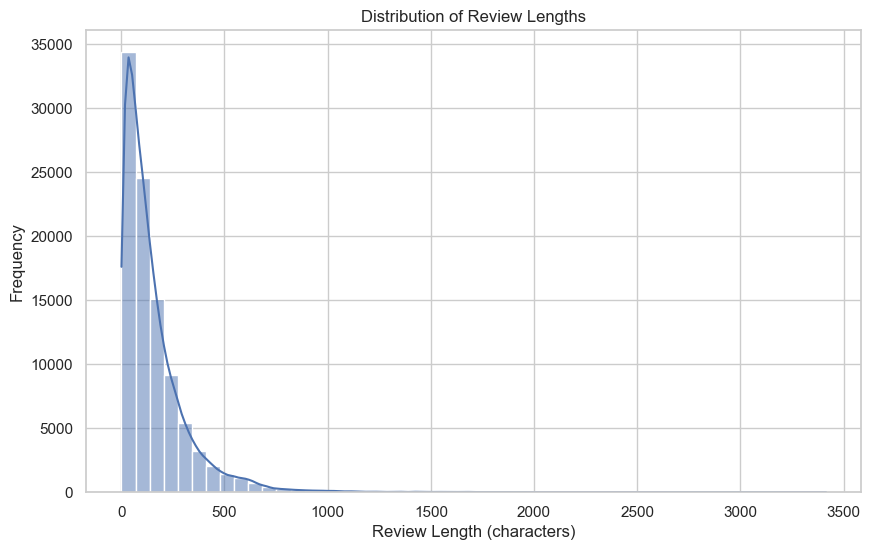

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure with a specified size for the histogram
plt.figure(figsize=(10, 6))

# Plotting a histogram of the review lengths with KDE
sns.histplot(label_reviews['review_length'], bins=50, kde=True)

# Adding title and labels to the histogram
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


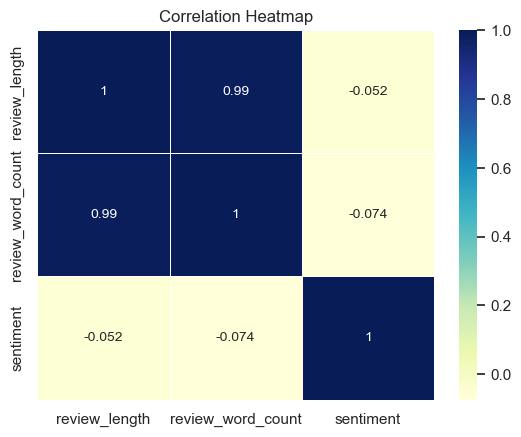

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for specified columns
correlation_matrix = label_reviews[['review_length', 'review_word_count', 'sentiment']].corr()

# Plotting the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 10})

# Adding a title to the heatmap
plt.title('Correlation Heatmap')

# Displaying the heatmap
plt.show()


In [32]:
# Calculate the proportion of each topic in the 'label_reviews' DataFrame as a percentage of the total
topic_proportions = label_reviews['topic'].value_counts(normalize=True)
print(topic_proportions)


topic
Location            0.387868
Cleanliness         0.365871
Facilities          0.140653
Customer_Service    0.105609
Name: proportion, dtype: float64


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


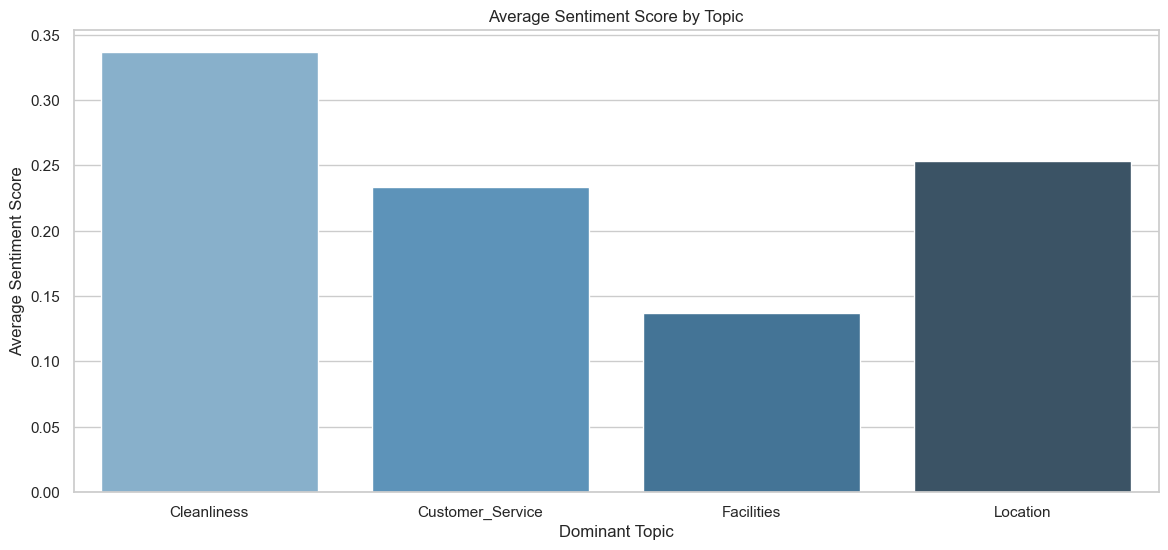

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'topic' and calculating the mean sentiment score for each topic
topic_sentiment = label_reviews.groupby('topic')['sentiment'].mean().reset_index()

# Setting up a figure for the bar plot
plt.figure(figsize=(14, 6))

# Creating a bar plot to visualize the average sentiment score for each topic
sns.barplot(x='topic', y='sentiment', data=topic_sentiment, palette='Blues_d')

# Adding a title and labels to the plot for better readability
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Sentiment Score')

# Displaying the plot
plt.show()


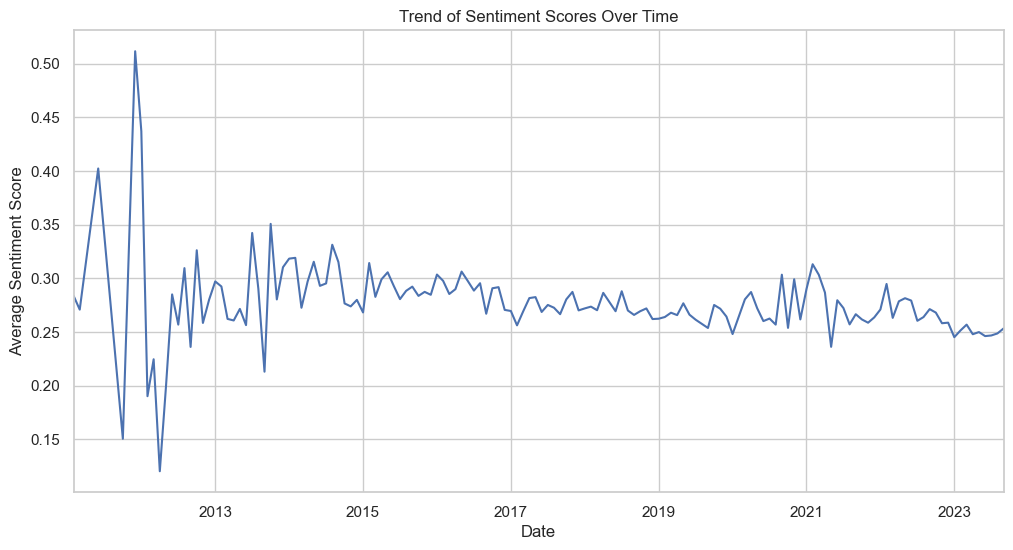

In [34]:
import matplotlib.pyplot as plt

# Grouping data by month and calculating the average sentiment score for each month
sentiment_over_time = label_reviews.groupby(label_reviews['date'].dt.to_period('M'))['sentiment'].mean()

# Setting up a line plot to visualize the trend
sentiment_over_time.plot(kind='line', figsize=(12, 6))

# Adding a title and axis labels to the plot
plt.title('Trend of Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

# Displaying the plot
plt.show()


In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')       
nltk.download('stopwords')  
nltk.download('wordnet')    

# Function to clean and preprocess text data
def clean_text(text):
    # Remove non-alphabetic characters and convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords (common words that may not contribute much meaning)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens (reduce them to their root form)
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Return the preprocessed text as a string
    return ' '.join(lemmatized_text)

# Apply the clean_text function to each comment in the 'comments' column
label_reviews['cleaned_comments'] = label_reviews['comments'].apply(clean_text)


[nltk_data] Downloading package punkt to /Users/aadisak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadisak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aadisak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with a maximum of 1000 features
# This vectorizer will convert the text data into a matrix of TF-IDF features
tfidf = TfidfVectorizer(max_features=10000)

# Apply the TF-IDF Vectorizer to the 'cleaned_comments' column
# This step converts the text data into a format suitable for machine learning models
tfidf_matrix = tfidf.fit_transform(label_reviews['cleaned_comments'])


In [37]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    # Create a TextBlob object and get the sentiment polarity
    # The polarity score is a float within the range [-1.0, 1.0]
    return TextBlob(text).sentiment.polarity

# Apply the get_sentiment function to each cleaned comment
# This computes the sentiment score for each comment
label_reviews['sentiment_score'] = label_reviews['cleaned_comments'].apply(get_sentiment)


In [38]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Split the dataset
X = tfidf_matrix
y = label_reviews['topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [39]:
#use grid search to find the best parameters 
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#
## Create the parameter grid based on the results of random search
#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [10, 20, 30],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [4, 6, 8],
#    'n_estimators': [100, 200, 300]
#}
#
## Create a based model
#rf = RandomForestClassifier()
#
## Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1)
#
## Fit the grid search to the data
#grid_search.fit(X_train, y_train)
#
## Print the best parameters
#print(grid_search.best_params_)
#
##evaluate the model
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#
## Make predictions
#y_pred = grid_search.predict(X_test)
#
## Print classification report
#print(classification_report(y_test, y_pred))

In [40]:
#Check shape of X_train
X_train.shape

(78849, 10000)

In [41]:
#Check shape of X_test
X_test.shape

(19713, 10000)

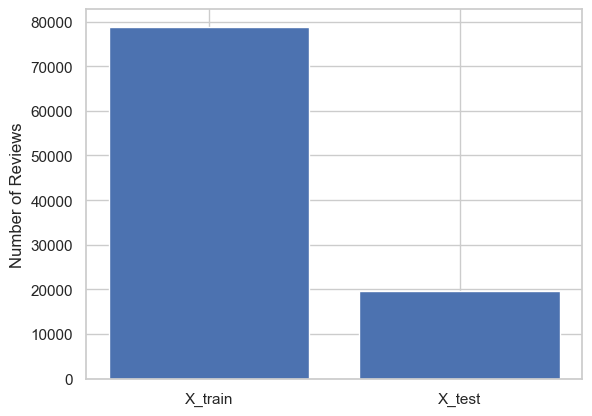

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array for x-axis positions
x = np.arange(2)

# Labels for the x-axis
years = ['X_train', 'X_test']

# Values to plot (number of rows in X_train and X_test)
values = [X_train.shape[0], X_test.shape[0]]

# Creating a bar chart
plt.bar(x, values)

# Set the x-axis to display the dataset names
plt.xticks(x, years)

# Adding label for y-axis
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()


/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/ANACONDA/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'C': 10, 'penalty': 'l2'}
                  precision    recall  f1-score   support

     Cleanliness       0.90      0.91      0.91      7229
Customer_Service       0.82      0.72      0.77      2110
      Facilities       0.78      0.84      0.81      2773
        Location       0.91      0.91      0.91      7601

        accuracy                           0.88     19713
       macro avg       0.85      0.85      0.85     19713
    weighted avg       0.88      0.88      0.88     19713



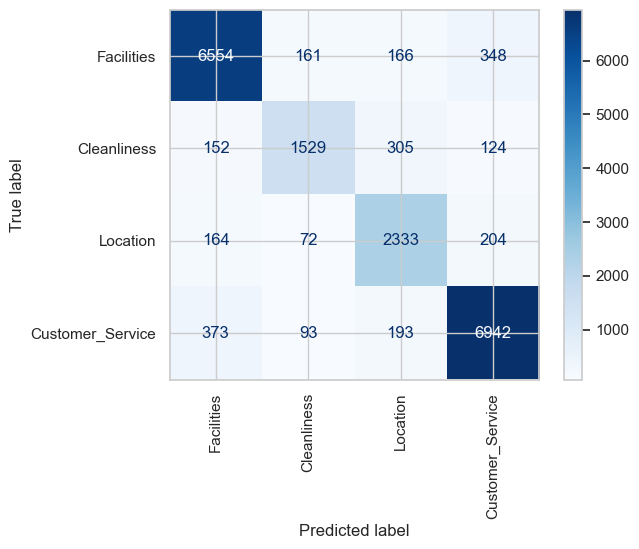

In [43]:
#use logistic regression to find the best parameters 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create the parameter grid based on the results of random search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a based model
logistic_regression = LogisticRegression(max_iter=1000)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

#evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

#Confusion Matrix display

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Facilities','Cleanliness','Location','Customer_Service'])
cmd.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.show()



In [44]:
# Assuming you already have the confusion matrix 'cm' and 'topics' defined
topics = ['Facilities','Cleanliness','Location','Customer_Service']  # Replace with your actual topics

# Assuming you already have the confusion matrix 'cm' and 'topics' defined
misclassification_rates = []

for i, topic in enumerate(topics):
    total_predictions = np.sum(cm[i, :])
    misclassified_predictions = total_predictions - cm[i, i]
    misclassification_rate = misclassified_predictions / total_predictions
    misclassification_rates.append((topic, misclassification_rate))

for topic, rate in misclassification_rates:
    print(f"Topic: {topic}, Misclassification Rate: {rate:.2%}")


Topic: Facilities, Misclassification Rate: 9.34%
Topic: Cleanliness, Misclassification Rate: 27.54%
Topic: Location, Misclassification Rate: 15.87%
Topic: Customer_Service, Misclassification Rate: 8.67%


In [45]:
#Find a mispredict sentence
result_df = pd.DataFrame({'true':y_test, 'pred':y_pred})
missprediction = result_df[result_df['true']!=result_df['pred']]
result_df.head()

,true,pred
83554,Cleanliness,Cleanliness
55879,Cleanliness,Cleanliness
2825,Cleanliness,Cleanliness
68959,Location,Cleanliness
8891,Customer_Service,Cleanliness


In [46]:
print(result_df.columns)


Index(['true', 'pred'], dtype='object')


In [47]:
import pandas as pd

# Assuming you have a DataFrame 'missprediction' with columns 'true' and 'pred'
# and another DataFrame 'label_reviews' with a 'comments' column.

mismatches = []  # List to store mismatched sentences

# Iterate through the 'missprediction' DataFrame
for i in range(len(missprediction)):
    if missprediction.iloc[i, 0] != missprediction.iloc[i, 1]:
        true_label = missprediction.iloc[i, 0]
        pred_label = missprediction.iloc[i, 1]
        index = missprediction.index[i]  # Get the index from 'missprediction'
        comment = label_reviews.loc[index, "comments"]  # Use the index to retrieve the comment
        mismatches.append((true_label, pred_label, comment))

# Print and display mismatched sentences
#for true_label, pred_label, comment in mismatches:
    #print("True Label:", true_label)
    #print("Predicted Label:", pred_label)
    #print("Comment:", comment)
    #print('\n')
#show full text in column 
pd.set_option('display.max_colwidth', None)
# Create a DataFrame from the mismatches list
missprediction_df = pd.DataFrame(mismatches, columns=["True_Label", "Predicted_Label", "Comment"])
missprediction_df.head(10)


,True_Label,Predicted_Label,Comment
0,Location,Cleanliness,"poac eto bangkok, clean ,comfy, located close metro, host person even though meet real life thanks"
1,Customer_Service,Cleanliness,"nivit best host ever seen whole life friendly, caring, honest always helpful helped make plan, even drove hospital ed visit hospital english speaker perfect tourist guide please consider tourist attractions provides took airport drop even time 5 free going suggest anyone wants visit bangkok feel like home"
2,Location,Cleanliness,"place host professional went beyond offering purchase mattress pad mentioned bed little stiff body type i’ll never forget gesture overall, satisfied comfortable place , location, plenty amenities, professional staff lobby personally, enjoyed view every morning happy chose place"
3,Facilities,Location,apartment condo clean modern things mention bed needs maintenance hear loud tuktuk sounds night recommended nights
4,Customer_Service,Cleanliness,"even though didnt meet erika person, home in"
5,Location,Cleanliness,everything perfect! pong saya hosts small super cute gifts check out sure come back go bangkok next time
6,Cleanliness,Customer_Service,"felt comfortable tuk's place ed second time! love privacy, interiour, bed, common pool tuk's always immediate friendly response questions"
7,Location,Cleanliness,"perfect, thank you!"
8,Facilities,Cleanliness,"midori helpful kind condo 1 min walk bts, convenient, despite condo bit old however, considering price wonderful swimming pool, highly recommend it"
9,Facilities,Cleanliness,beautiful condo


In [48]:
#Show example of mispredict sentence 10 rows

for true_label, pred_label, comment in mismatches[:20]:
    print("True Label:", true_label)
    print("Predicted Label:", pred_label)
    print("Comment:", comment)
    print('\n')

True Label: Location
Predicted Label: Cleanliness
Comment:  poac eto  bangkok, clean ,comfy,  located close metro, host   person even though meet real life thanks


True Label: Customer_Service
Predicted Label: Cleanliness
Comment: nivit best host ever seen whole life friendly, caring, honest always helpful helped  make plan, even drove hospital ed visit hospital   english speaker perfect tourist guide please  consider tourist attractions provides took  airport drop even time 5 free going suggest anyone wants visit bangkok feel like home


True Label: Location
Predicted Label: Cleanliness
Comment:  place  host professional went beyond offering purchase mattress pad mentioned bed little stiff body type i’ll never forget gesture overall, satisfied  comfortable place ,  location, plenty amenities, professional staff lobby personally,  enjoyed view every morning happy chose place


True Label: Facilities
Predicted Label: Location
Comment:  apartment  condo clean modern things mention bed n

In [49]:
#find predict proba 
y_pred_proba = grid_search.predict_proba(X_test)
y_pred_proba

#find predict proba for each topic
y_pred_proba_topic = y_pred_proba[:,0:4]

#put predict proba into dataframe
y_pred_proba_topic_df = pd.DataFrame(y_pred_proba_topic, columns=['Facilities_Convenience','Cleanliness_Hospitality','Location_Accessibility','Host_Interaction_and_Experience'])
y_pred_proba_topic_df.tail()


,Facilities_Convenience,Cleanliness_Hospitality,Location_Accessibility,Host_Interaction_and_Experience
19708,2.221314e-07,8.404248e-08,9.516716e-08,1.000000
19709,6.655083e-01,2.846351e-01,4.931514e-02,0.000541
19710,9.797420e-01,7.624612e-03,1.210180e-02,0.000532
19711,9.991402e-01,5.604780e-04,7.052503e-06,0.000292
19712,2.643432e-01,6.871026e-02,4.633496e-01,0.203597
